# Credit Card Default Prediction using Ensemble Learning

**Objective:** Predict whether a customer will default on their credit card payment in the next month using ensemble machine learning models.

**Dataset:** Credit card clients in Taiwan from April 2005 to September 2005

**Target Variable:** default.payment.next.month (1 = Default, 0 = No Default)

## By 23AIML042

## Default Credit Card Client Dataset
* Link : https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset/data


#  Credit Card Default Dataset

## About Dataset

This dataset contains information on **default payments, demographic factors, credit data, history of payment, and bill statements** of credit card clients in **Taiwan** from **April 2005 to September 2005**.

---

##  Dataset Variables (25 Total)

### Demographic Information
- **ID**: Unique identifier for each client
- **SEX**: Gender (1 = male, 2 = female)
- **EDUCATION**: Education level
  - 1 = graduate school
  - 2 = university
  - 3 = high school
  - 4 = others
  - 5, 6 = unknown
- **MARRIAGE**: Marital status (1 = married, 2 = single, 3 = others)
- **AGE**: Age in years

### Credit Information
- **LIMIT_BAL**: Amount of given credit in NT dollars (includes individual and family/supplementary credit)

### Repayment Status (PAY_0 to PAY_6)
Repayment status for September 2005 to April 2005:
- **PAY_0**: September 2005
- **PAY_2**: August 2005
- **PAY_3**: July 2005
- **PAY_4**: June 2005
- **PAY_5**: May 2005
- **PAY_6**: April 2005

**Scale**: -1 = pay duly, 1 = payment delay for one month, 2 = payment delay for two months, ..., 9 = payment delay for nine months and above

### Bill Statement Amounts (BILL_AMT1 to BILL_AMT6)
Amount of bill statement in NT dollars:
- **BILL_AMT1**: September 2005
- **BILL_AMT2**: August 2005
- **BILL_AMT3**: July 2005
- **BILL_AMT4**: June 2005
- **BILL_AMT5**: May 2005
- **BILL_AMT6**: April 2005

### Previous Payment Amounts (PAY_AMT1 to PAY_AMT6)
Amount of previous payment in NT dollars:
- **PAY_AMT1**: September 2005
- **PAY_AMT2**: August 2005
- **PAY_AMT3**: July 2005
- **PAY_AMT4**: June 2005
- **PAY_AMT5**: May 2005
- **PAY_AMT6**: April 2005

### Target Variable
- **default.payment.next.month**: Default payment (1 = yes, 0 = no)

---

## Acknowledgements

**Source**: UCI Machine Learning Repository  
**Citation**: Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

In [1]:
!pip install opendatasets

## 1. Import Libraries

In [2]:
# Data manipulation
import pandas as pd
import opendatasets as od
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    precision_score,
    recall_score,
    f1_score
)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-darkgrid')
import joblib
%matplotlib inline


we will download our dataset using opendatasets library
``` pip install opendatasets ```

My Kaggle Cradentials

```
{"username":"omchoksi04","key":"5bd54ee741a1835da715caead453e032"}
```

### Download Dataset

In [3]:
df_link ="https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset/data"
od.download(df_link)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: OMCHOKSI04
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset


100%|██████████| 0.98M/0.98M [00:00<00:00, 738MB/s]

## 2. Load Dataset

In [3]:
# Load data
df = pd.read_csv('/content/default-of-credit-card-clients-dataset/UCI_Credit_Card.csv')
print(f"Dataset Shape: {df.shape}")

Dataset Shape: (30000, 25)


In [4]:
# Display first rows
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
# Display last rows
df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
29995,29996,220000.0,1,3,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1
29999,30000,50000.0,1,2,1,46,0,0,0,0,0,0,47929.0,48905.0,49764.0,36535.0,32428.0,15313.0,2078.0,1800.0,1430.0,1000.0,1000.0,1000.0,1


## 3. Initial Data Exploration

In [6]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [7]:
# Statistical summary
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [8]:
# Column names
print("Column Names:")
print(df.columns.tolist())

Column Names:
['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default.payment.next.month']


In [9]:
# Data types
print("Data Types:")
print(df.dtypes)

Data Types:
ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object


## 4. Missing Values Analysis

In [10]:
# Check missing values
print("Missing Values Count:")
print(df.isnull().sum())
print(f"\nTotal Missing Values: {df.isnull().sum().sum()}")

Missing Values Count:
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

Total Missing Values: 0


In [11]:
# Missing values percentage
missing_pct = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': df.isnull().sum(),
    'Percentage': missing_pct
})
print(missing_df[missing_df['Missing_Count'] > 0])

Empty DataFrame
Columns: [Missing_Count, Percentage]
Index: []


## 5. Duplicate Records Analysis

In [12]:
# Check duplicates
print(f"Number of Duplicate Rows: {df.duplicated().sum()}")

Number of Duplicate Rows: 0


In [13]:
# Display duplicates if any
if df.duplicated().sum() > 0:
    print("Duplicate Rows:")
    print(df[df.duplicated()])
else:
    print("No duplicate rows found.")

No duplicate rows found.


## 6. Target Variable Analysis

In [14]:
# Target variable distribution
print("Target Variable Distribution:")
print(df['default.payment.next.month'].value_counts())

Target Variable Distribution:
default.payment.next.month
0    23364
1     6636
Name: count, dtype: int64


In [15]:
# Target variable percentage
print("Target Variable Percentage:")
print(df['default.payment.next.month'].value_counts(normalize=True) * 100)

Target Variable Percentage:
default.payment.next.month
0    77.88
1    22.12
Name: proportion, dtype: float64


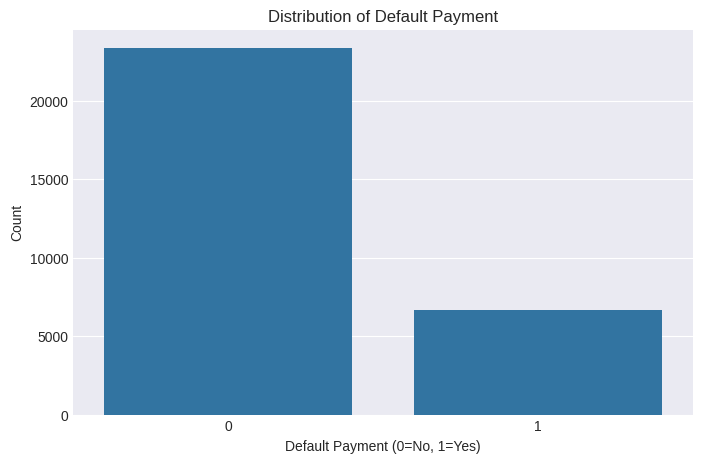

In [16]:
# Visualize target variable
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='default.payment.next.month')
plt.title('Distribution of Default Payment')
plt.xlabel('Default Payment (0=No, 1=Yes)')
plt.ylabel('Count')
plt.show()

## 7. Feature Analysis

In [17]:
# Identify feature types
categorical_cols = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
numerical_cols = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
                  'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
                  'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

print(f"Categorical Features: {len(categorical_cols)}")
print(f"Numerical Features: {len(numerical_cols)}")

Categorical Features: 9
Numerical Features: 14


In [18]:
# Categorical features unique values
print("Unique Values in Categorical Features:")
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")

Unique Values in Categorical Features:
SEX: [2 1]
EDUCATION: [2 1 3 5 4 6 0]
MARRIAGE: [1 2 3 0]
PAY_0: [ 2 -1  0 -2  1  3  4  8  7  5  6]
PAY_2: [ 2  0 -1 -2  3  5  7  4  1  6  8]
PAY_3: [-1  0  2 -2  3  4  6  7  1  5  8]
PAY_4: [-1  0 -2  2  3  4  5  7  6  1  8]
PAY_5: [-2  0 -1  2  3  5  4  7  8  6]
PAY_6: [-2  2  0 -1  3  6  4  7  8  5]


In [19]:
# Statistical summary of numerical features
df[numerical_cols].describe()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,9.217904,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,34.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


## 8. Univariate Analysis - Numerical Features

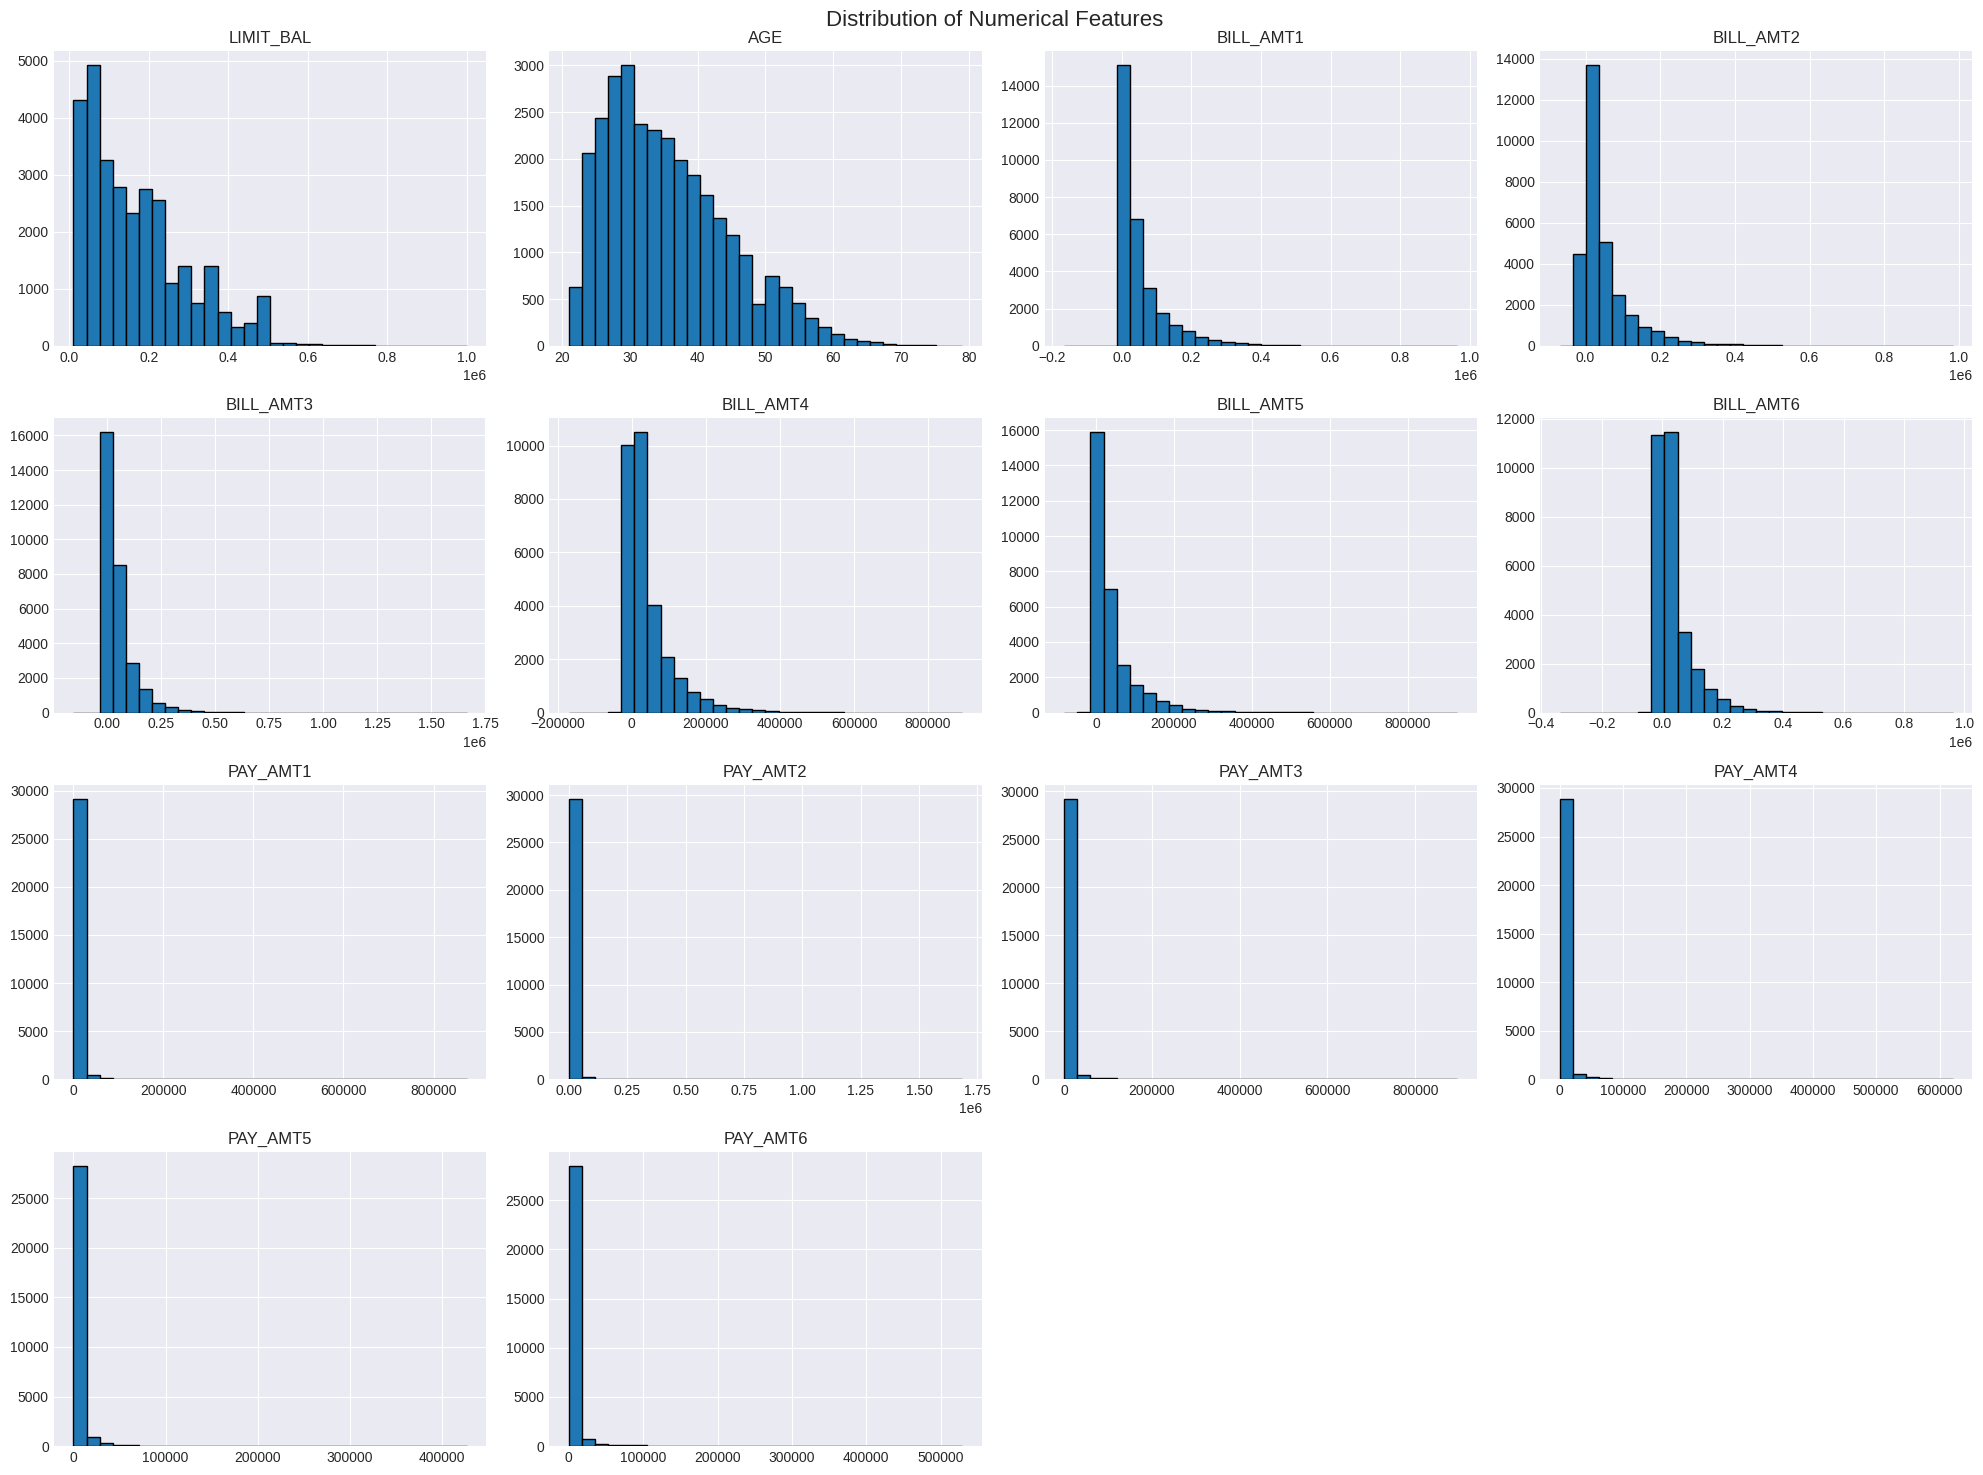

In [20]:
# Distribution of numerical features
df[numerical_cols].hist(bins=30, figsize=(20, 15), edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

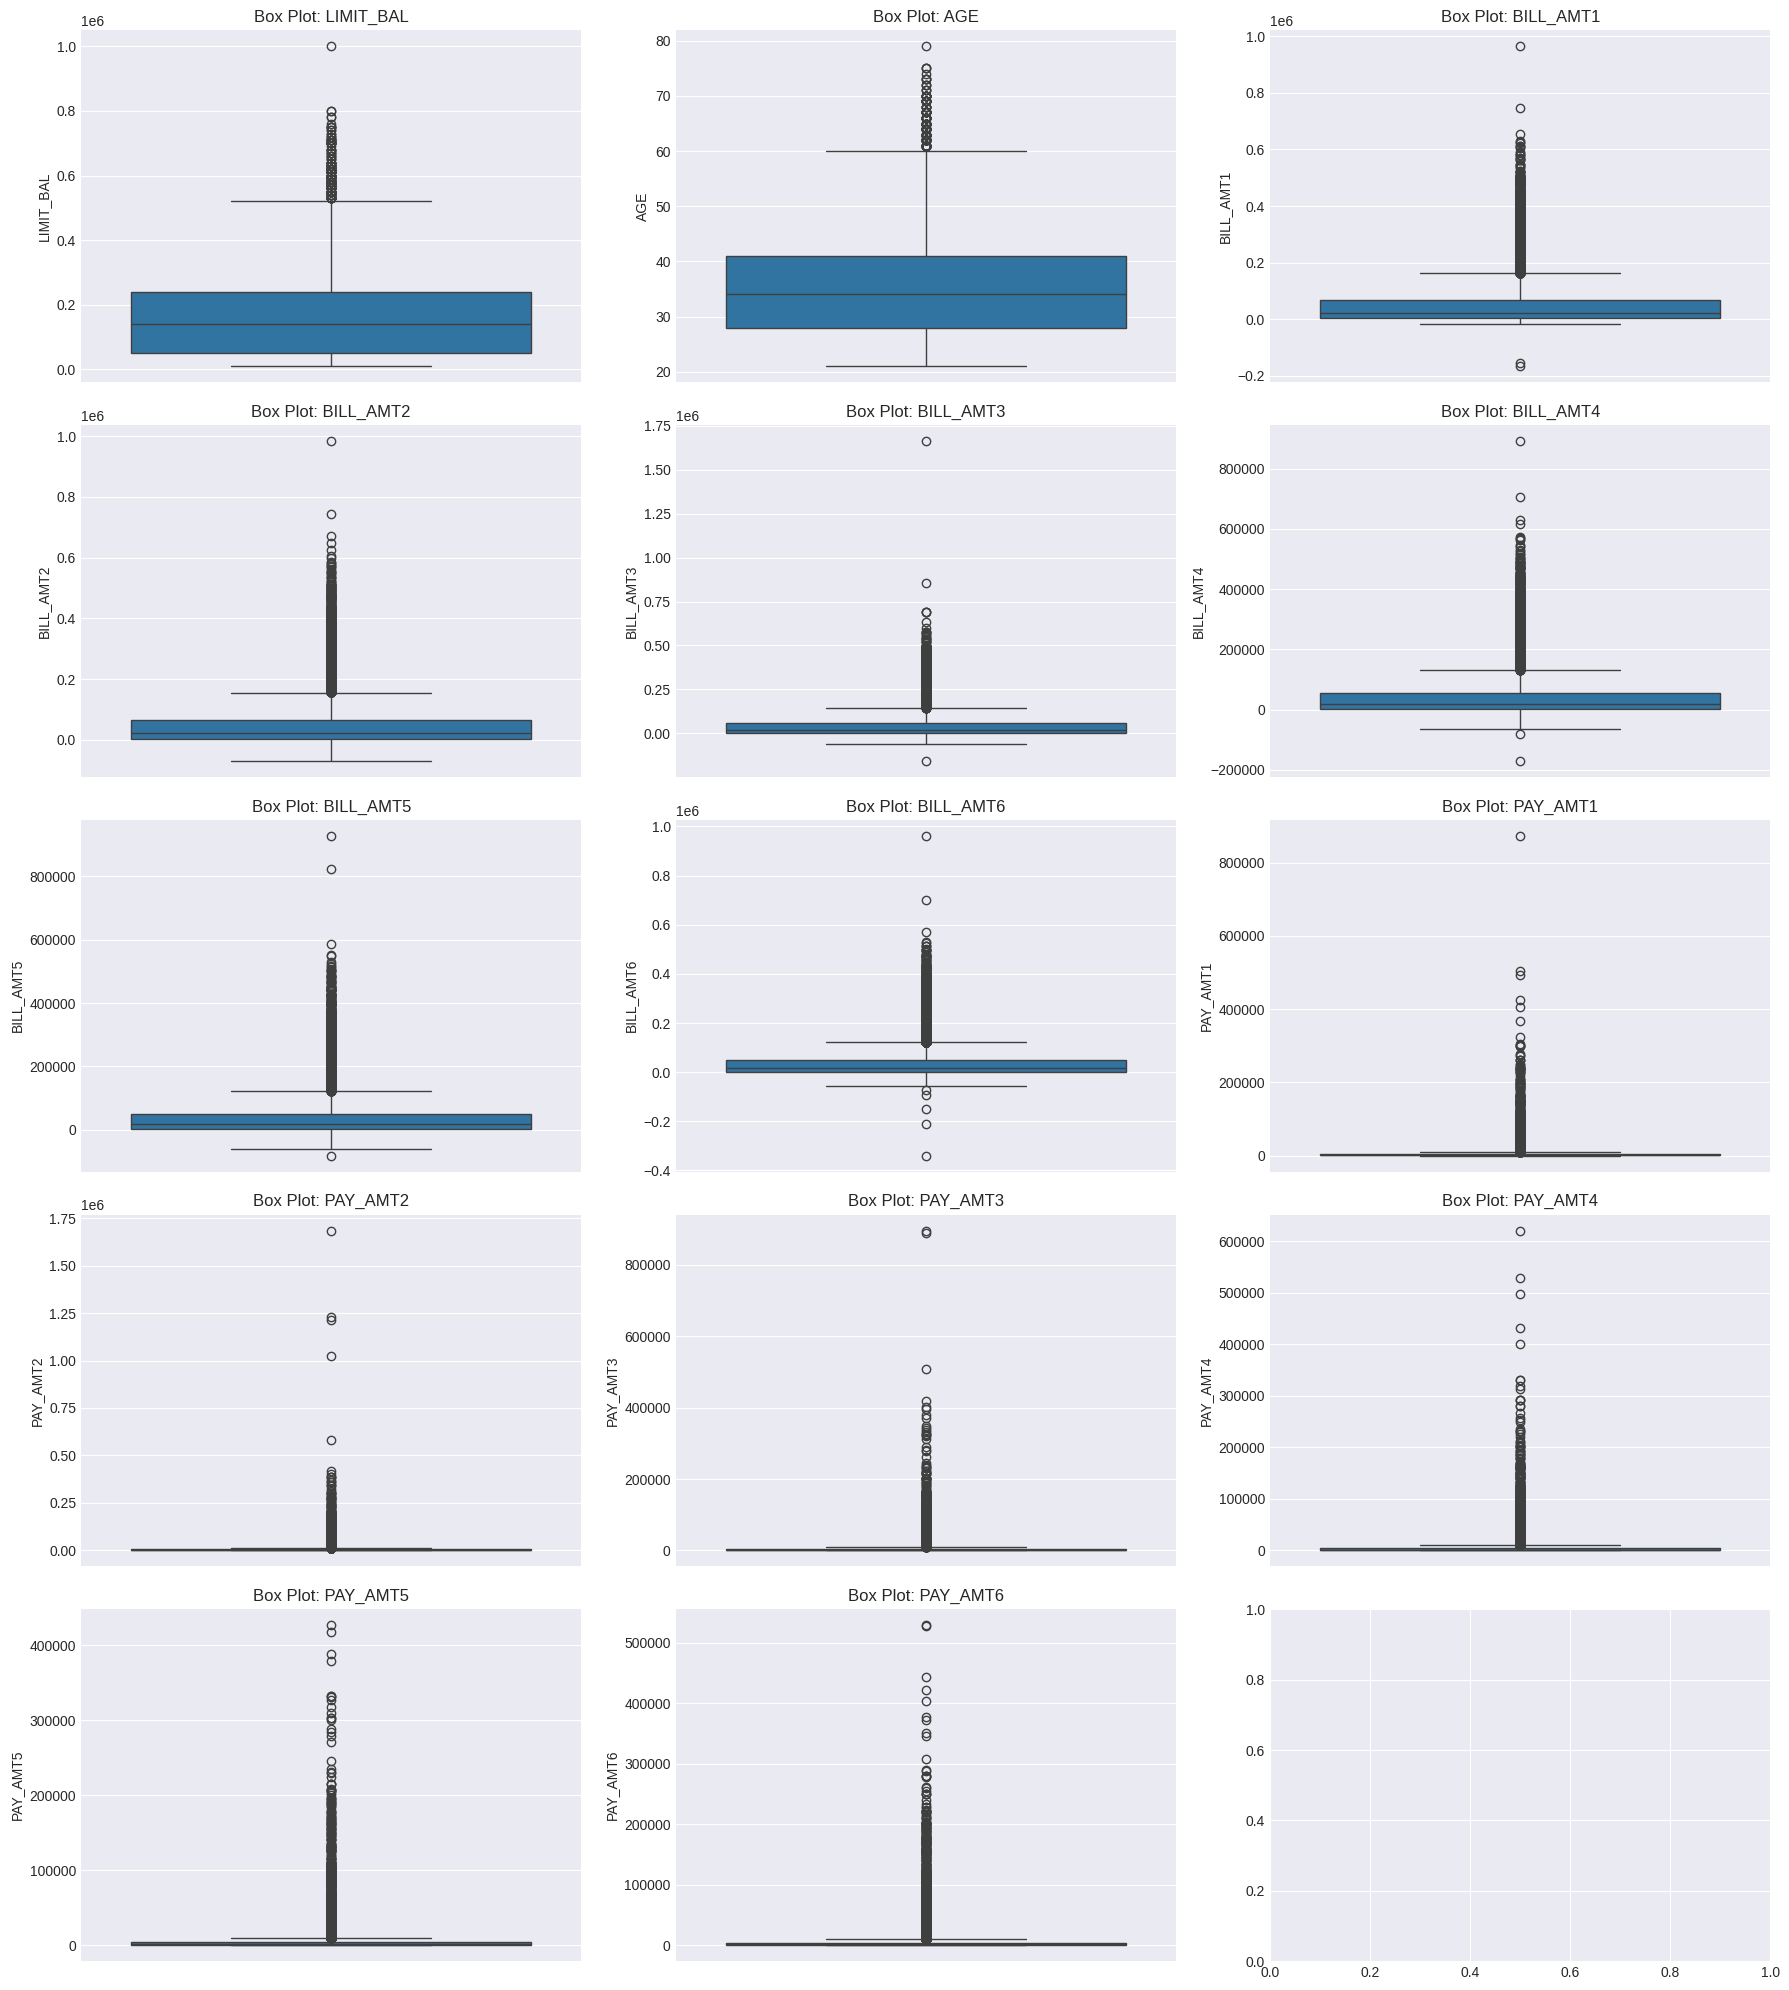

In [21]:
# Box plots for numerical features
fig, axes = plt.subplots(5, 3, figsize=(18, 20))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    sns.boxplot(data=df, y=col, ax=axes[idx])
    axes[idx].set_title(f'Box Plot: {col}')

plt.tight_layout()
plt.show()

## 9. Univariate Analysis - Categorical Features

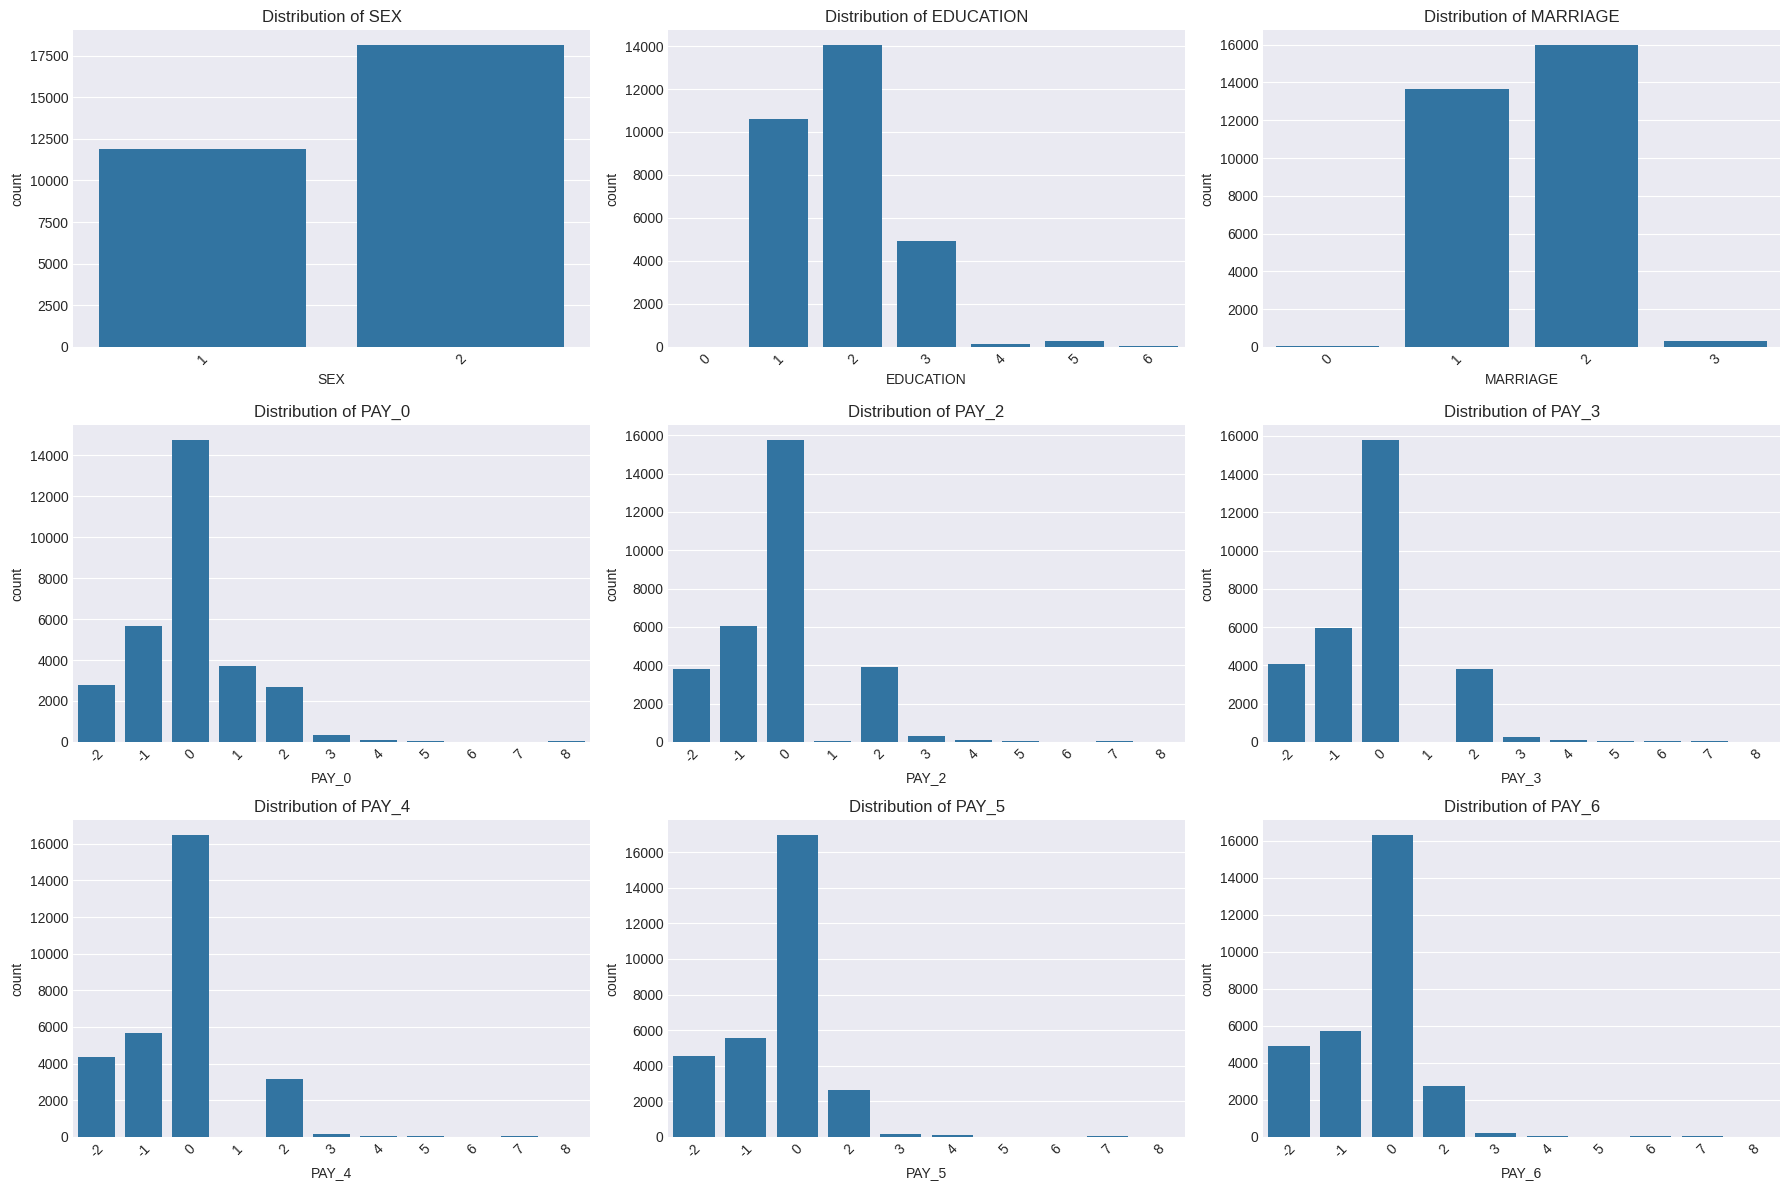

In [22]:
# Count plots for categorical features
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 10. Bivariate Analysis - Categorical vs Target

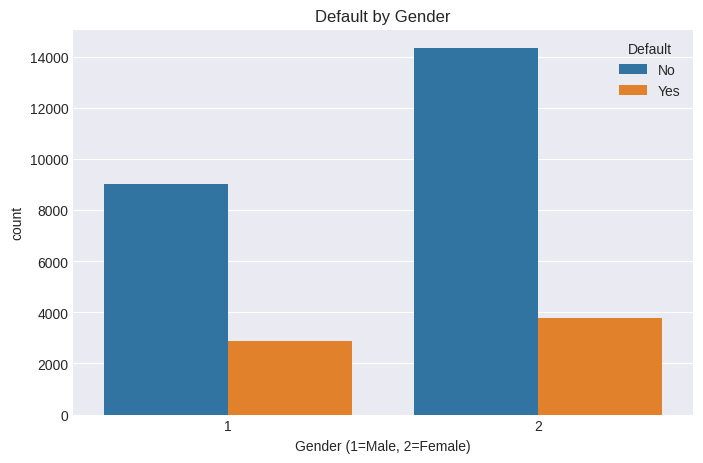

In [23]:
# SEX vs Default
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='SEX', hue='default.payment.next.month')
plt.title('Default by Gender')
plt.xlabel('Gender (1=Male, 2=Female)')
plt.legend(title='Default', labels=['No', 'Yes'])
plt.show()

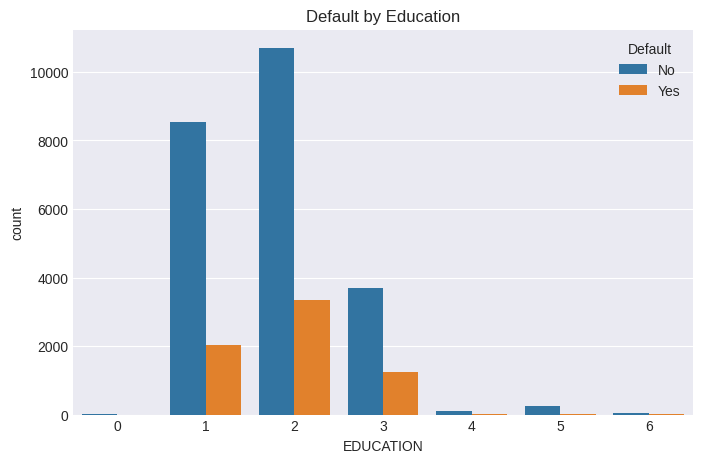

In [24]:
# EDUCATION vs Default
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='EDUCATION', hue='default.payment.next.month')
plt.title('Default by Education')
plt.legend(title='Default', labels=['No', 'Yes'])
plt.show()

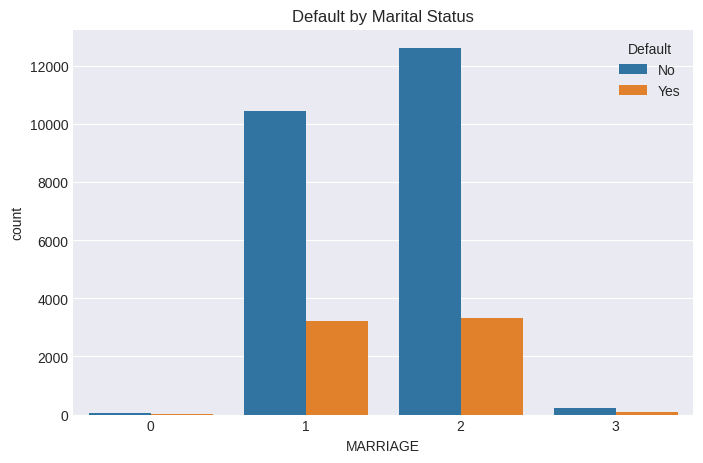

In [25]:
# MARRIAGE vs Default
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='MARRIAGE', hue='default.payment.next.month')
plt.title('Default by Marital Status')
plt.legend(title='Default', labels=['No', 'Yes'])
plt.show()

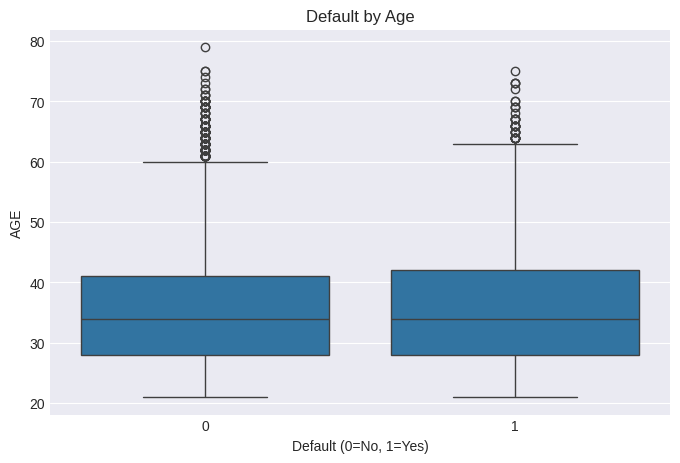

In [26]:
# AGE vs Default
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='default.payment.next.month', y='AGE')
plt.title('Default by Age')
plt.xlabel('Default (0=No, 1=Yes)')
plt.show()

## 11. Correlation Analysis

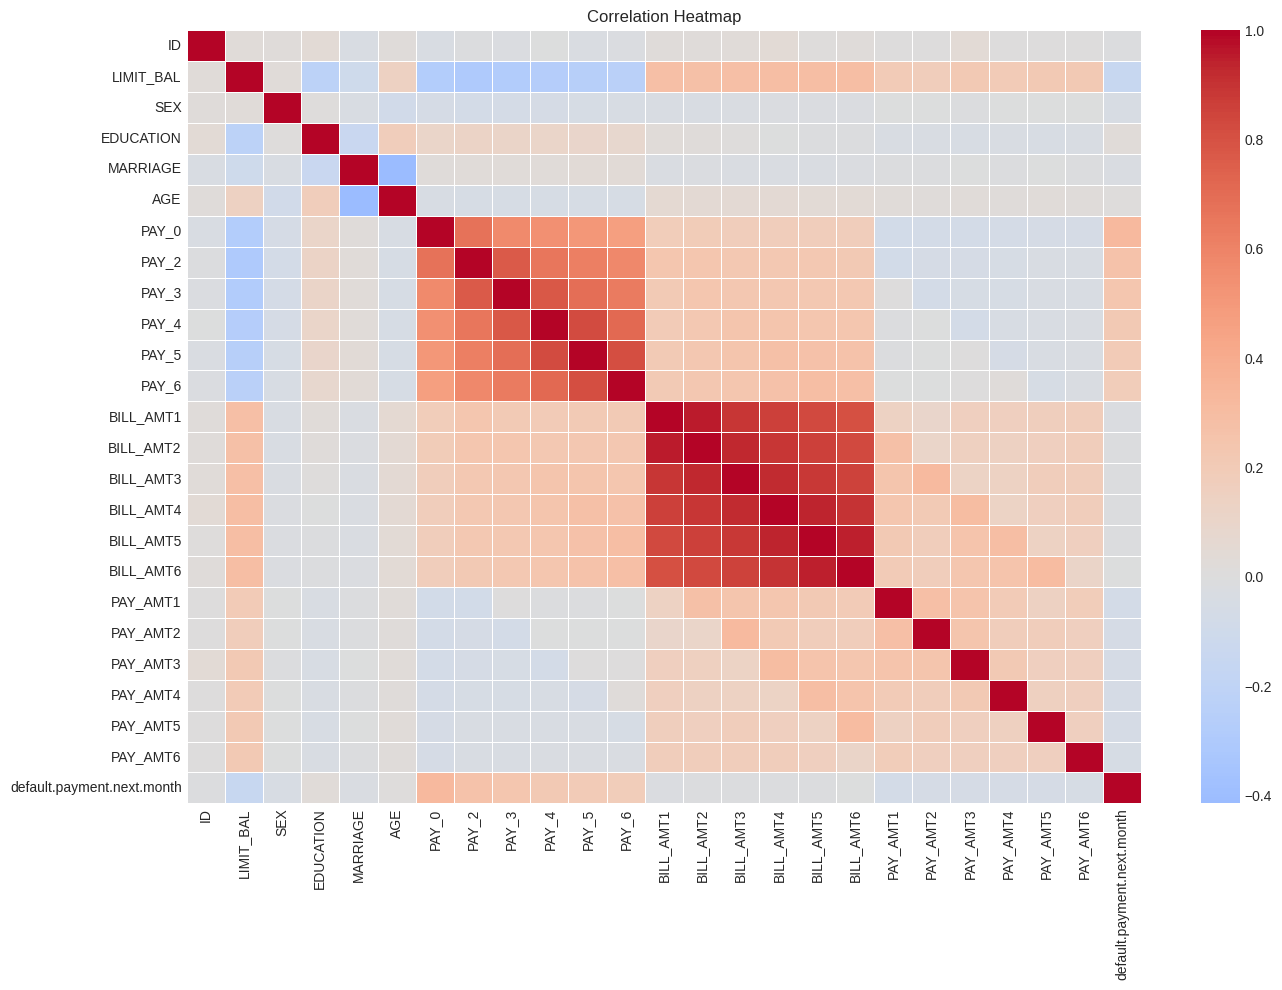

In [27]:
# Correlation matrix
plt.figure(figsize=(14, 10))
correlation = df.corr()
sns.heatmap(correlation, annot=False, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [28]:
# Correlation with target variable
target_corr = df.corr()['default.payment.next.month'].sort_values(ascending=False)
print("Correlation with Target Variable:")
print(target_corr)

Correlation with Target Variable:
default.payment.next.month    1.000000
PAY_0                         0.324794
PAY_2                         0.263551
PAY_3                         0.235253
PAY_4                         0.216614
PAY_5                         0.204149
PAY_6                         0.186866
EDUCATION                     0.028006
AGE                           0.013890
BILL_AMT6                    -0.005372
BILL_AMT5                    -0.006760
BILL_AMT4                    -0.010156
ID                           -0.013952
BILL_AMT3                    -0.014076
BILL_AMT2                    -0.014193
BILL_AMT1                    -0.019644
MARRIAGE                     -0.024339
SEX                          -0.039961
PAY_AMT6                     -0.053183
PAY_AMT5                     -0.055124
PAY_AMT3                     -0.056250
PAY_AMT4                     -0.056827
PAY_AMT2                     -0.058579
PAY_AMT1                     -0.072929
LIMIT_BAL                    -

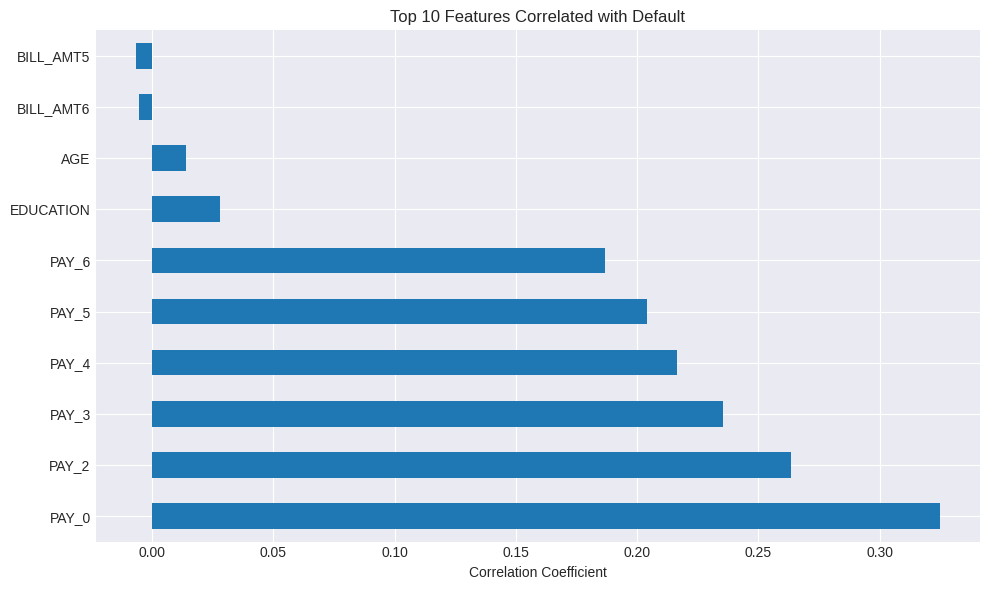

In [29]:
# Visualize top correlations with target
top_corr = target_corr[1:11]  # Exclude target itself
plt.figure(figsize=(10, 6))
top_corr.plot(kind='barh')
plt.title('Top 10 Features Correlated with Default')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

## 12. Outlier Detection

In [30]:
# Detect outliers using IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

In [31]:
# Outlier analysis for numerical features
print("Outlier Analysis:")
for col in numerical_cols:
    count, lower, upper = detect_outliers(df, col)
    print(f"{col}: {count} outliers ({count/len(df)*100:.2f}%)")

Outlier Analysis:
LIMIT_BAL: 167 outliers (0.56%)
AGE: 272 outliers (0.91%)
BILL_AMT1: 2400 outliers (8.00%)
BILL_AMT2: 2395 outliers (7.98%)
BILL_AMT3: 2469 outliers (8.23%)
BILL_AMT4: 2622 outliers (8.74%)
BILL_AMT5: 2725 outliers (9.08%)
BILL_AMT6: 2693 outliers (8.98%)
PAY_AMT1: 2745 outliers (9.15%)
PAY_AMT2: 2714 outliers (9.05%)
PAY_AMT3: 2598 outliers (8.66%)
PAY_AMT4: 2994 outliers (9.98%)
PAY_AMT5: 2945 outliers (9.82%)
PAY_AMT6: 2958 outliers (9.86%)


## 13. Data Preprocessing - Handle Invalid Values

In [32]:
# Create copy for preprocessing
df_clean = df.copy()

In [33]:
# Check unique values in EDUCATION
print("Unique values in EDUCATION:")
print(df_clean['EDUCATION'].value_counts().sort_index())

Unique values in EDUCATION:
EDUCATION
0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: count, dtype: int64


In [34]:
# Check unique values in MARRIAGE
print("Unique values in MARRIAGE:")
print(df_clean['MARRIAGE'].value_counts().sort_index())

Unique values in MARRIAGE:
MARRIAGE
0       54
1    13659
2    15964
3      323
Name: count, dtype: int64


In [35]:
# Handle invalid values in EDUCATION (0, 5, 6 -> 4 as 'others')
df_clean['EDUCATION'] = df_clean['EDUCATION'].replace([0, 5, 6], 4)
print("After cleaning EDUCATION:")
print(df_clean['EDUCATION'].value_counts().sort_index())

After cleaning EDUCATION:
EDUCATION
1    10585
2    14030
3     4917
4      468
Name: count, dtype: int64


In [36]:
# Handle invalid values in MARRIAGE (0 -> 3 as 'others')
df_clean['MARRIAGE'] = df_clean['MARRIAGE'].replace(0, 3)
print("After cleaning MARRIAGE:")
print(df_clean['MARRIAGE'].value_counts().sort_index())

After cleaning MARRIAGE:
MARRIAGE
1    13659
2    15964
3      377
Name: count, dtype: int64


## 14. Feature Engineering

In [37]:
# Create average bill amount
df_clean['AVG_BILL_AMT'] = df_clean[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
                                      'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].mean(axis=1)
print("Created AVG_BILL_AMT")

Created AVG_BILL_AMT


In [38]:
# Create average payment amount
df_clean['AVG_PAY_AMT'] = df_clean[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
                                     'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].mean(axis=1)
print("Created AVG_PAY_AMT")

Created AVG_PAY_AMT


In [39]:
# Create payment to bill ratio
df_clean['PAY_TO_BILL_RATIO'] = df_clean['AVG_PAY_AMT'] / (df_clean['AVG_BILL_AMT'] + 1)
print("Created PAY_TO_BILL_RATIO")

Created PAY_TO_BILL_RATIO


In [40]:
# Create total delayed payments count
df_clean['TOTAL_DELAY'] = (df_clean['PAY_0'] > 0).astype(int) + \
                          (df_clean['PAY_2'] > 0).astype(int) + \
                          (df_clean['PAY_3'] > 0).astype(int) + \
                          (df_clean['PAY_4'] > 0).astype(int) + \
                          (df_clean['PAY_5'] > 0).astype(int) + \
                          (df_clean['PAY_6'] > 0).astype(int)
print("Created TOTAL_DELAY")

Created TOTAL_DELAY


In [41]:
# Create credit utilization
df_clean['CREDIT_UTILIZATION'] = df_clean['AVG_BILL_AMT'] / (df_clean['LIMIT_BAL'] + 1)
print("Created CREDIT_UTILIZATION")

Created CREDIT_UTILIZATION


In [42]:
# Display new features
print("New Features Created:")
df_clean[['AVG_BILL_AMT', 'AVG_PAY_AMT', 'PAY_TO_BILL_RATIO',
          'TOTAL_DELAY', 'CREDIT_UTILIZATION']].head()

New Features Created:


,AVG_BILL_AMT,AVG_PAY_AMT,PAY_TO_BILL_RATIO,TOTAL_DELAY,CREDIT_UTILIZATION
0,1284.000000,114.833333,0.089364,2,0.064197
1,2846.166667,833.333333,0.292689,2,0.023718
2,16942.166667,1836.333333,0.108382,0,0.188244
3,38555.666667,1398.000000,0.036258,0,0.771098
4,18223.166667,9841.500000,0.540025,0,0.364456


In [43]:
df.to_csv('credit_card_cleaned.csv', index=False)
print("Cleaned dataset saved successfully!")

Cleaned dataset saved successfully!


## 15. Feature Selection - Prepare X and y

In [44]:
# Separate features and target
X = df_clean.drop(['default.payment.next.month', 'ID'], axis=1)
y = df_clean['default.payment.next.month']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (30000, 28)
Target shape: (30000,)


In [45]:
# Display feature columns
print("Feature Columns:")
print(X.columns.tolist())

Feature Columns:
['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'AVG_BILL_AMT', 'AVG_PAY_AMT', 'PAY_TO_BILL_RATIO', 'TOTAL_DELAY', 'CREDIT_UTILIZATION']


In [46]:
# Check for any remaining missing values
print(f"Missing values in X: {X.isnull().sum().sum()}")
print(f"Missing values in y: {y.isnull().sum()}")

Missing values in X: 2
Missing values in y: 0


## 16. Train-Test Split

In [47]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

Training set: 24000 samples (80.0%)
Test set: 6000 samples (20.0%)


In [48]:
# Check class distribution in train and test
print("Training set default rate: {:.2f}%".format(y_train.sum()/len(y_train)*100))
print("Test set default rate: {:.2f}%".format(y_test.sum()/len(y_test)*100))

Training set default rate: 22.12%
Test set default rate: 22.12%


## 17. Feature Scaling

In [49]:
# Initialize scaler
scaler = StandardScaler()

In [50]:
# Fit and transform training data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [51]:
# Convert back to DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("Data scaled successfully")

Data scaled successfully


## 18. Model Training - Random Forest (Bagging)

In [52]:
# Initialize Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    random_state=42,
    n_jobs=-1
)

print("Training Random Forest Classifier...")

Training Random Forest Classifier...


In [53]:
# Train model
rf_model.fit(X_train, y_train)
print("Random Forest training completed")

Random Forest training completed


In [54]:
# Make predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

print("Predictions completed")

Predictions completed


In [55]:
# Evaluate Random Forest
print("="*60)
print("RANDOM FOREST CLASSIFIER RESULTS")
print("="*60)
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba_rf):.4f}")

RANDOM FOREST CLASSIFIER RESULTS
Accuracy: 0.8177
Precision: 0.6598
Recall: 0.3625
F1-Score: 0.4679
ROC-AUC: 0.7704


In [56]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.66      0.36      0.47      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



In [57]:
# Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(cm_rf)

Confusion Matrix:
[[4425  248]
 [ 846  481]]


## 19. Model Training - AdaBoost (Boosting)

In [58]:
# Initialize AdaBoost
ada_model = AdaBoostClassifier(
    n_estimators=100,
    learning_rate=1.0,
    random_state=42
)
ada_model

AdaBoostClassifier(n_estimators=100, random_state=42)

In [59]:
nan_indices_train = X_train[X_train.isnull().any(axis=1)].index
X_train = X_train.drop(nan_indices_train)
y_train = y_train.drop(nan_indices_train)

# Train model
ada_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [60]:
# Make predictions
y_pred_ada = ada_model.predict(X_test)
y_pred_proba_ada = ada_model.predict_proba(X_test)[:, 1]

print("Predictions completed")

Predictions completed


In [61]:
# Evaluate AdaBoost
print("="*60)
print("ADABOOST CLASSIFIER RESULTS")
print("="*60)
print(f"Accuracy: {accuracy_score(y_test, y_pred_ada):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_ada):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_ada):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_ada):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba_ada):.4f}")

ADABOOST CLASSIFIER RESULTS
Accuracy: 0.8175
Precision: 0.6747
Recall: 0.3376
F1-Score: 0.4500
ROC-AUC: 0.7753


In [62]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_ada))

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.67      0.34      0.45      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.67      6000
weighted avg       0.80      0.82      0.79      6000



In [63]:
# Confusion matrix
cm_ada = confusion_matrix(y_test, y_pred_ada)
print("Confusion Matrix:")
print(cm_ada)

Confusion Matrix:
[[4457  216]
 [ 879  448]]


## 20. Model Training - Gradient Boosting (Boosting)

In [64]:
# Initialize Gradient Boosting
gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

gb_model

GradientBoostingClassifier(max_depth=5, random_state=42)

In [65]:
# Train model
gb_model.fit(X_train, y_train)
print("Gradient Boosting training completed")

Gradient Boosting training completed


In [66]:
# Make predictions
y_pred_gb = gb_model.predict(X_test)
y_pred_proba_gb = gb_model.predict_proba(X_test)[:, 1]

print("Predictions completed")

Predictions completed


In [67]:
# Evaluate Gradient Boosting
print("="*60)
print("GRADIENT BOOSTING CLASSIFIER RESULTS")
print("="*60)
print(f"Accuracy: {accuracy_score(y_test, y_pred_gb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_gb):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_gb):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_gb):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba_gb):.4f}")

GRADIENT BOOSTING CLASSIFIER RESULTS
Accuracy: 0.8162
Precision: 0.6522
Recall: 0.3617
F1-Score: 0.4653
ROC-AUC: 0.7777


In [68]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_gb))

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.65      0.36      0.47      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



In [69]:
# Confusion matrix
cm_gb = confusion_matrix(y_test, y_pred_gb)
print("Confusion Matrix:")
print(cm_gb)

Confusion Matrix:
[[4417  256]
 [ 847  480]]


## 21. Model Training - XGBoost (Boosting)

In [70]:
# Initialize XGBoost
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

print("Training XGBoost Classifier...")

Training XGBoost Classifier...


In [71]:
# Train model
xgb_model.fit(X_train, y_train)
xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [72]:
# Make predictions
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]


In [73]:
# Evaluate XGBoost
print("="*60)
print("XGBOOST CLASSIFIER RESULTS")
print("="*60)
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_xgb):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_xgb):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_xgb):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba_xgb):.4f}")

XGBOOST CLASSIFIER RESULTS
Accuracy: 0.8152
Precision: 0.6489
Recall: 0.3580
F1-Score: 0.4614
ROC-AUC: 0.7767


In [74]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.65      0.36      0.46      1327

    accuracy                           0.82      6000
   macro avg       0.74      0.65      0.67      6000
weighted avg       0.80      0.82      0.79      6000



In [75]:
# Confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print("Confusion Matrix:")
print(cm_xgb)

Confusion Matrix:
[[4416  257]
 [ 852  475]]


## 22. Model Comparison

In [76]:
# Create comparison dataframe
models_comparison = pd.DataFrame({
    'Model': ['Random Forest', 'AdaBoost', 'Gradient Boosting', 'XGBoost'],
    'Type': ['Bagging', 'Boosting', 'Boosting', 'Boosting'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_ada),
        accuracy_score(y_test, y_pred_gb),
        accuracy_score(y_test, y_pred_xgb)
    ],
    'Precision': [
        precision_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_ada),
        precision_score(y_test, y_pred_gb),
        precision_score(y_test, y_pred_xgb)
    ],
    'Recall': [
        recall_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_ada),
        recall_score(y_test, y_pred_gb),
        recall_score(y_test, y_pred_xgb)
    ],
    'F1-Score': [
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_ada),
        f1_score(y_test, y_pred_gb),
        f1_score(y_test, y_pred_xgb)
    ],
    'ROC-AUC': [
        roc_auc_score(y_test, y_pred_proba_rf),
        roc_auc_score(y_test, y_pred_proba_ada),
        roc_auc_score(y_test, y_pred_proba_gb),
        roc_auc_score(y_test, y_pred_proba_xgb)
    ]
})

In [77]:
# Sort by ROC-AUC
models_comparison = models_comparison.sort_values('ROC-AUC', ascending=False)
print("\n" + "="*80)
print("ENSEMBLE MODELS COMPARISON")
print("="*80)
print(models_comparison.to_string(index=False))
print("="*80)


ENSEMBLE MODELS COMPARISON
            Model     Type  Accuracy  Precision   Recall  F1-Score  ROC-AUC
Gradient Boosting Boosting  0.816167   0.652174 0.361718  0.465342 0.777699
          XGBoost Boosting  0.815167   0.648907 0.357950  0.461389 0.776709
         AdaBoost Boosting  0.817500   0.674699 0.337604  0.450025 0.775306
    Random Forest  Bagging  0.817667   0.659808 0.362472  0.467899 0.770426


## 23. Visualization - Model Performance Comparison

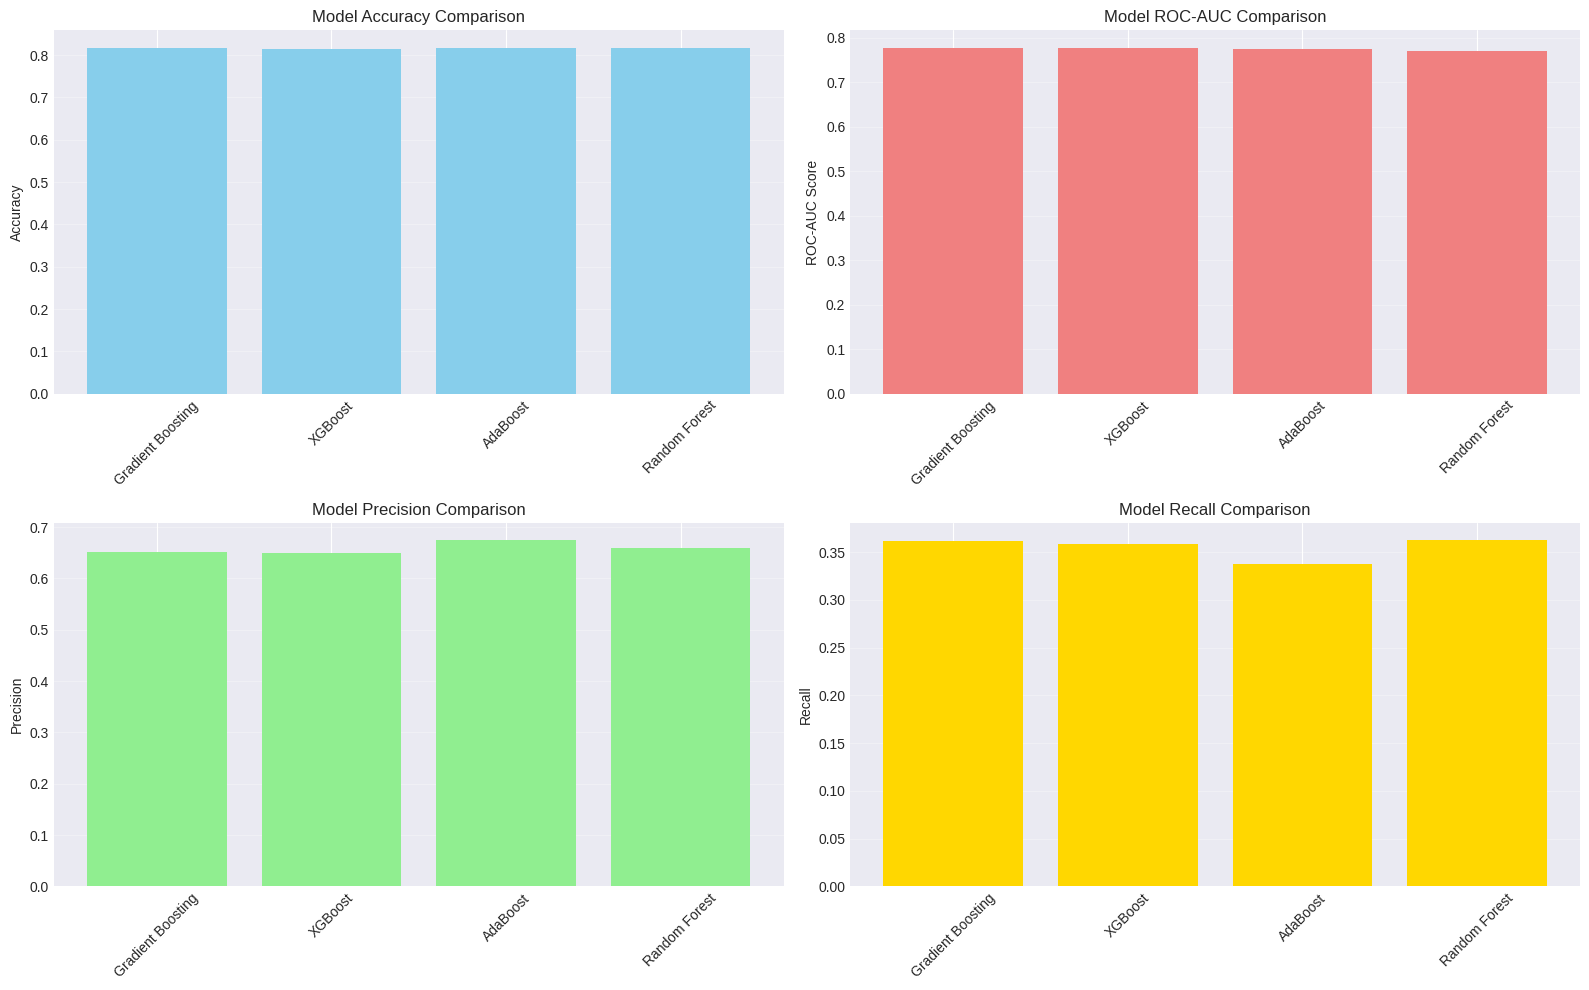

In [78]:
# Performance metrics bar plots
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Accuracy
axes[0, 0].bar(models_comparison['Model'], models_comparison['Accuracy'], color='skyblue')
axes[0, 0].set_title('Model Accuracy Comparison')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(axis='y', alpha=0.3)

# ROC-AUC
axes[0, 1].bar(models_comparison['Model'], models_comparison['ROC-AUC'], color='lightcoral')
axes[0, 1].set_title('Model ROC-AUC Comparison')
axes[0, 1].set_ylabel('ROC-AUC Score')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(axis='y', alpha=0.3)

# Precision
axes[1, 0].bar(models_comparison['Model'], models_comparison['Precision'], color='lightgreen')
axes[1, 0].set_title('Model Precision Comparison')
axes[1, 0].set_ylabel('Precision')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(axis='y', alpha=0.3)

# Recall
axes[1, 1].bar(models_comparison['Model'], models_comparison['Recall'], color='gold')
axes[1, 1].set_title('Model Recall Comparison')
axes[1, 1].set_ylabel('Recall')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 24. Visualization - ROC Curves

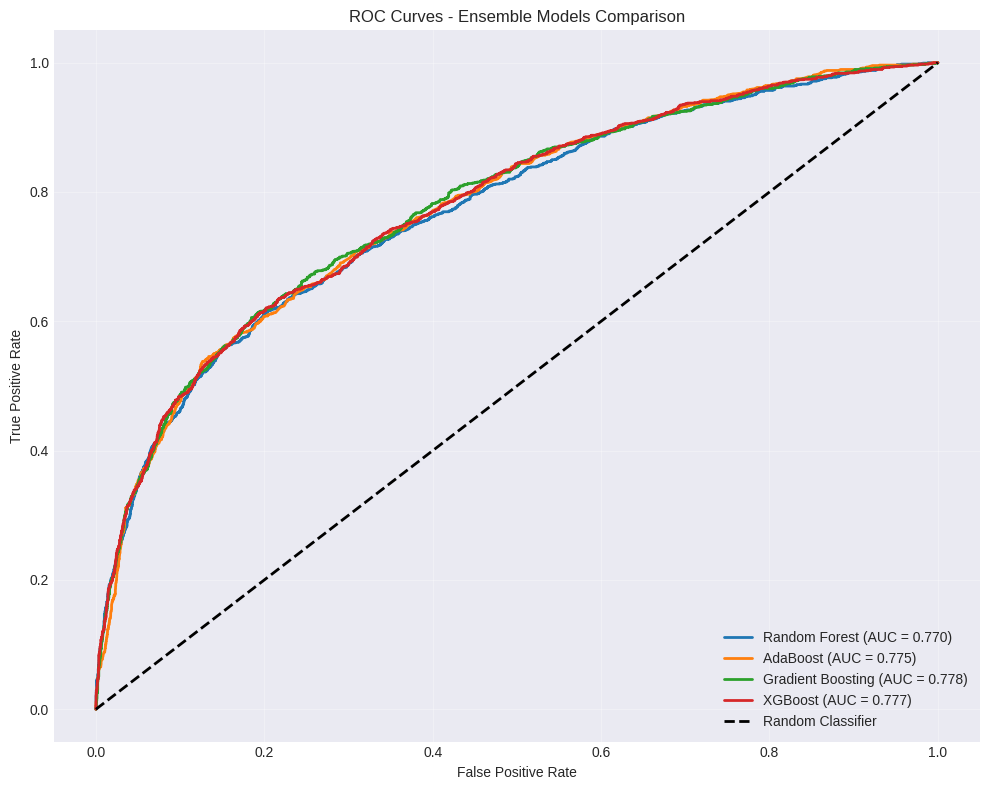

In [79]:
# Plot ROC curves for all models
plt.figure(figsize=(10, 8))

models_data = [
    ('Random Forest', y_pred_proba_rf),
    ('AdaBoost', y_pred_proba_ada),
    ('Gradient Boosting', y_pred_proba_gb),
    ('XGBoost', y_pred_proba_xgb)
]

for name, y_proba in models_data:
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.3f})', linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier', linewidth=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Ensemble Models Comparison')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## 25. Visualization - Confusion Matrices

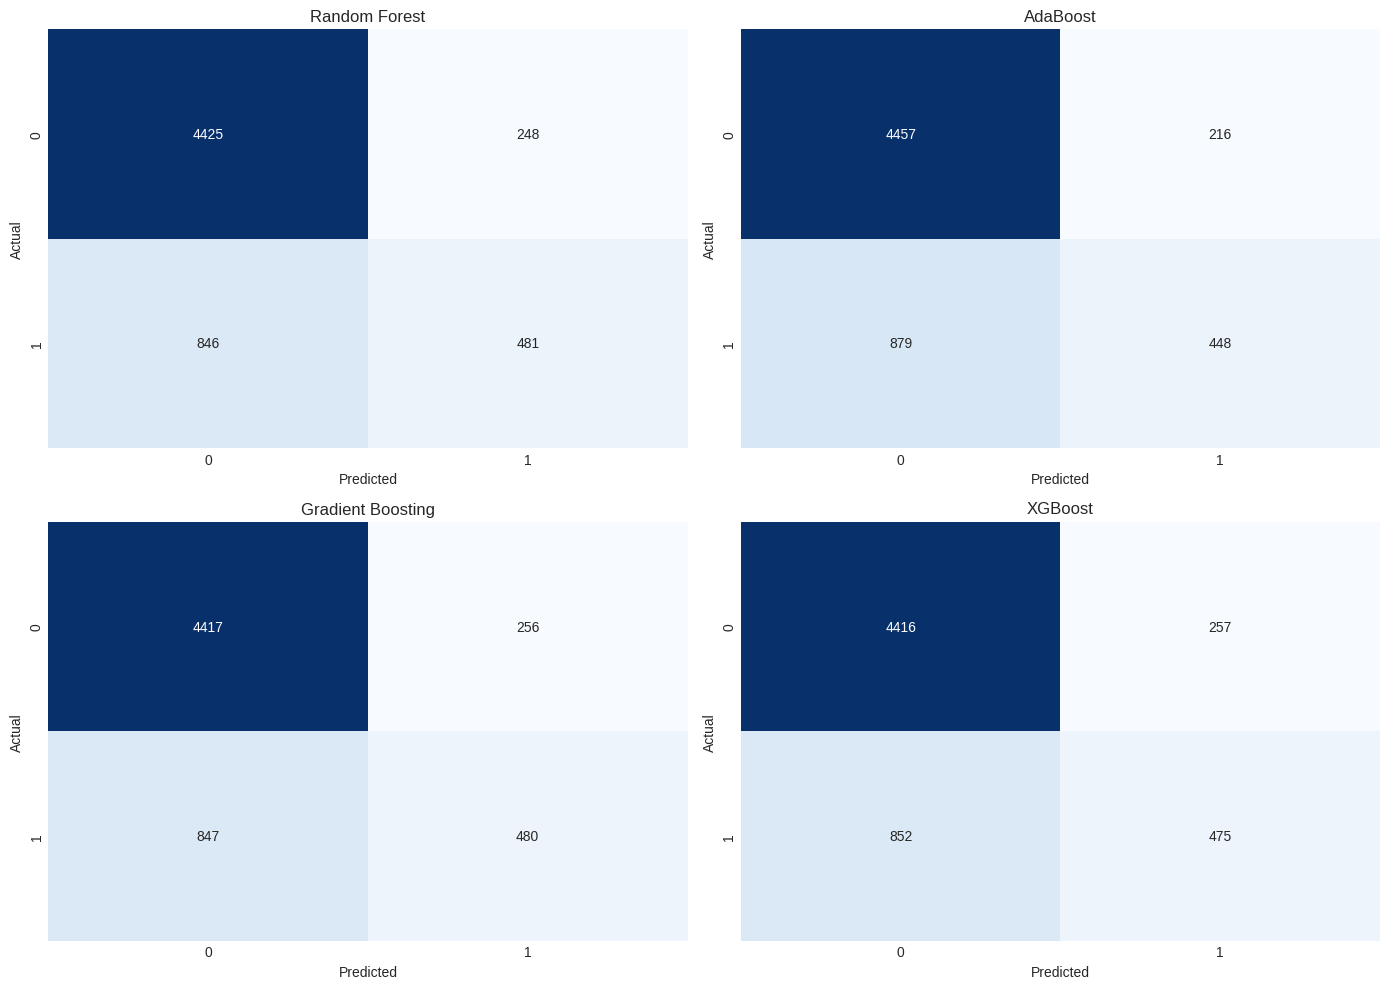

In [80]:
# Plot confusion matrices for all models
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

models_predictions = [
    ('Random Forest', y_pred_rf),
    ('AdaBoost', y_pred_ada),
    ('Gradient Boosting', y_pred_gb),
    ('XGBoost', y_pred_xgb)
]

for idx, (name, y_pred) in enumerate(models_predictions):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx], cbar=False)
    axes[idx].set_title(f'{name}')
    axes[idx].set_ylabel('Actual')
    axes[idx].set_xlabel('Predicted')

plt.tight_layout()
plt.show()

## 26. Hyperparameter Tuning - Random Forest

In [81]:
# Define parameter grid for Random Forest
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5]
}
rf_params

{'n_estimators': [100, 200],
 'max_depth': [10, 15, 20],
 'min_samples_split': [2, 5]}

In [82]:
# Grid search
rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    rf_params,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)
rf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 15, 20], 'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='roc_auc', verbose=1)

In [83]:
# Best parameters
print(f"Best RF Parameters: {rf_grid.best_params_}")
print(f"Best RF Cross-Validation ROC-AUC: {rf_grid.best_score_:.4f}")

Best RF Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Best RF Cross-Validation ROC-AUC: 0.7852


## 27. Hyperparameter Tuning - AdaBoost

In [84]:
# Define parameter grid for AdaBoost
ada_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

print("Starting AdaBoost hyperparameter tuning...")

Starting AdaBoost hyperparameter tuning...


In [85]:
# Grid search
ada_grid = GridSearchCV(
    AdaBoostClassifier(random_state=42),
    ada_params,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)
ada_grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1.0],
                         'n_estimators': [50, 100, 200]},
             scoring='roc_auc', verbose=1)

In [86]:
# Best parameters
print(f"Best AdaBoost Parameters: {ada_grid.best_params_}")
print(f"Best AdaBoost Cross-Validation ROC-AUC: {ada_grid.best_score_:.4f}")

Best AdaBoost Parameters: {'learning_rate': 1.0, 'n_estimators': 200}
Best AdaBoost Cross-Validation ROC-AUC: 0.7812


## 28. Hyperparameter Tuning - Gradient Boosting

In [93]:
# Define parameter grid for Gradient Boosting
gb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7]
}
gb_params

{'n_estimators': [100, 200],
 'learning_rate': [0.01, 0.1],
 'max_depth': [3, 5, 7]}

In [88]:
# Grid search
gb_grid = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    gb_params,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)
gb_grid.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200]},
             scoring='roc_auc', verbose=1)

In [89]:
# Best parameters
print(f"Best GB Parameters: {gb_grid.best_params_}")
print(f"Best GB Cross-Validation ROC-AUC: {gb_grid.best_score_:.4f}")

Best GB Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best GB Cross-Validation ROC-AUC: 0.7849


## 29. Hyperparameter Tuning - XGBoost

In [90]:
# Define parameter grid for XGBoost
xgb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7]
}
xgb_params

{'n_estimators': [100, 200],
 'learning_rate': [0.01, 0.1],
 'max_depth': [3, 5, 7]}

In [91]:
# Grid search
xgb_grid = GridSearchCV(
    XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    xgb_params,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)
xgb_grid.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200]},
             scoring='roc_auc', verbose=1)

In [92]:
# Best parameters
print(f"Best XGBoost Parameters: {xgb_grid.best_params_}")
print(f"Best XGBoost Cross-Validation ROC-AUC: {xgb_grid.best_score_:.4f}")

Best XGBoost Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best XGBoost Cross-Validation ROC-AUC: 0.7865


## 30. Evaluate Tuned Models

In [94]:
# Store tuned models
tuned_models = {
    'Random Forest': rf_grid.best_estimator_,
    'AdaBoost': ada_grid.best_estimator_,
    'Gradient Boosting': gb_grid.best_estimator_,
    'XGBoost': xgb_grid.best_estimator_
}

In [95]:
# Evaluate all tuned models
tuned_results = []

for name, model in tuned_models.items():
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    tuned_results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_pred_proba)
    })

In [96]:
# Display tuned models performance
tuned_df = pd.DataFrame(tuned_results).sort_values('ROC-AUC', ascending=False)
print("\n" + "="*80)
print("TUNED MODELS PERFORMANCE ON TEST SET")
print("="*80)
print(tuned_df.to_string(index=False))
print("="*80)


TUNED MODELS PERFORMANCE ON TEST SET
            Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC
Gradient Boosting  0.818667   0.664828 0.363225  0.469786 0.781936
          XGBoost  0.819167   0.669944 0.359457  0.467876 0.780109
    Random Forest  0.815833   0.656338 0.351168  0.457536 0.777122
         AdaBoost  0.817167   0.673193 0.336850  0.449021 0.775617


## 31. Feature Importance Analysis - Random Forest

In [97]:
# Get feature importance from tuned Random Forest
feature_importance_rf = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_grid.best_estimator_.feature_importances_
}).sort_values('Importance', ascending=False)

print("Top 10 Important Features (Random Forest):")
print(feature_importance_rf.head(10))

Top 10 Important Features (Random Forest):
               Feature  Importance
5                PAY_0    0.209592
26         TOTAL_DELAY    0.133147
6                PAY_2    0.085872
7                PAY_3    0.041733
27  CREDIT_UTILIZATION    0.037013
25   PAY_TO_BILL_RATIO    0.034808
8                PAY_4    0.034320
24         AVG_PAY_AMT    0.034080
0            LIMIT_BAL    0.028965
23        AVG_BILL_AMT    0.028206


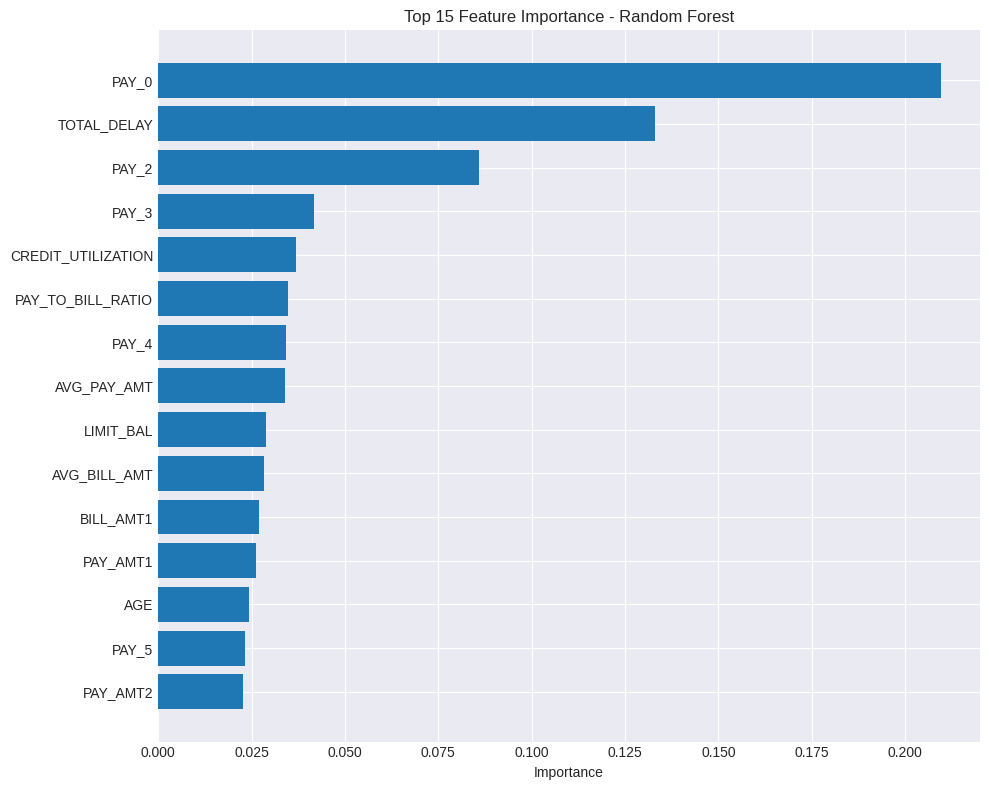

In [98]:
# Visualize feature importance
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_rf['Feature'][:15], feature_importance_rf['Importance'][:15])
plt.xlabel('Importance')
plt.title('Top 15 Feature Importance - Random Forest')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 32. Feature Importance Analysis - XGBoost

In [99]:
# Get feature importance from tuned XGBoost
feature_importance_xgb = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_grid.best_estimator_.feature_importances_
}).sort_values('Importance', ascending=False)

print("Top 10 Important Features (XGBoost):")
print(feature_importance_xgb.head(10))

Top 10 Important Features (XGBoost):
               Feature  Importance
5                PAY_0    0.370614
26         TOTAL_DELAY    0.259319
25   PAY_TO_BILL_RATIO    0.031725
24         AVG_PAY_AMT    0.027409
27  CREDIT_UTILIZATION    0.027097
0            LIMIT_BAL    0.026472
23        AVG_BILL_AMT    0.022693
18            PAY_AMT2    0.019908
11           BILL_AMT1    0.016286
22            PAY_AMT6    0.014634


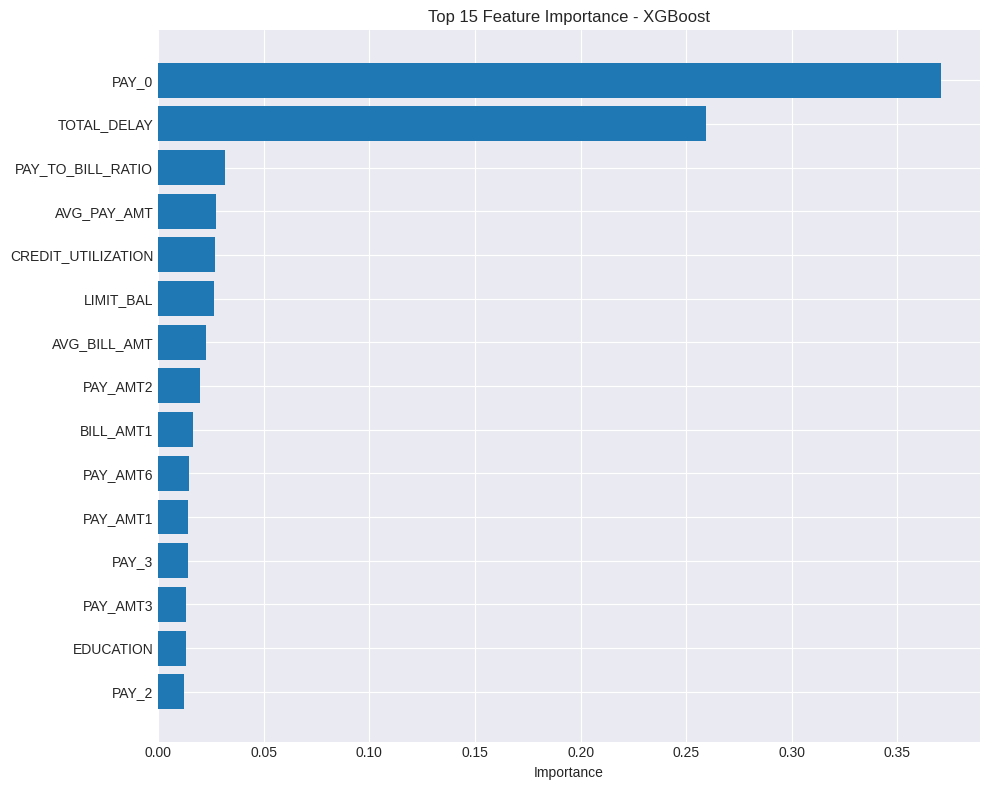

In [100]:
# Visualize feature importance
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_xgb['Feature'][:15], feature_importance_xgb['Importance'][:15])
plt.xlabel('Importance')
plt.title('Top 15 Feature Importance - XGBoost')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 33. Bagging vs Boosting Analysis

In [101]:
# Add Type column to tuned results
tuned_df['Type'] = ['Bagging' if 'Random Forest' in model else 'Boosting'
                     for model in tuned_df['Model']]

In [102]:
# Separate by type
bagging_models = tuned_df[tuned_df['Type'] == 'Bagging']
boosting_models = tuned_df[tuned_df['Type'] == 'Boosting']

print("\n" + "="*80)
print("BAGGING VS BOOSTING COMPARISON")
print("="*80)
print("\nBagging Approach (Random Forest):")
print(bagging_models[['Model', 'Accuracy', 'ROC-AUC']].to_string(index=False))
print("\nBoosting Approaches:")
print(boosting_models[['Model', 'Accuracy', 'ROC-AUC']].to_string(index=False))


BAGGING VS BOOSTING COMPARISON

Bagging Approach (Random Forest):
        Model  Accuracy  ROC-AUC
Random Forest  0.815833 0.777122

Boosting Approaches:
            Model  Accuracy  ROC-AUC
Gradient Boosting  0.818667 0.781936
          XGBoost  0.819167 0.780109
         AdaBoost  0.817167 0.775617


In [103]:
# Average performance by type
print("\nAverage Performance:")
print(f"Bagging Average ROC-AUC: {bagging_models['ROC-AUC'].mean():.4f}")
print(f"Boosting Average ROC-AUC: {boosting_models['ROC-AUC'].mean():.4f}")


Average Performance:
Bagging Average ROC-AUC: 0.7771
Boosting Average ROC-AUC: 0.7792


In [104]:
# Determine which approach is better
best_overall = tuned_df.iloc[0]
print(f"\nBest Model: {best_overall['Model']} ({best_overall['Type']})")
print(f"Best ROC-AUC: {best_overall['ROC-AUC']:.4f}")

if bagging_models['ROC-AUC'].mean() > boosting_models['ROC-AUC'].mean():
    print("\nConclusion: Bagging performs better on average for this dataset.")
else:
    print("\nConclusion: Boosting performs better on average for this dataset.")


Best Model: Gradient Boosting (Boosting)
Best ROC-AUC: 0.7819

Conclusion: Boosting performs better on average for this dataset.


## 34. Visualization - Bagging vs Boosting

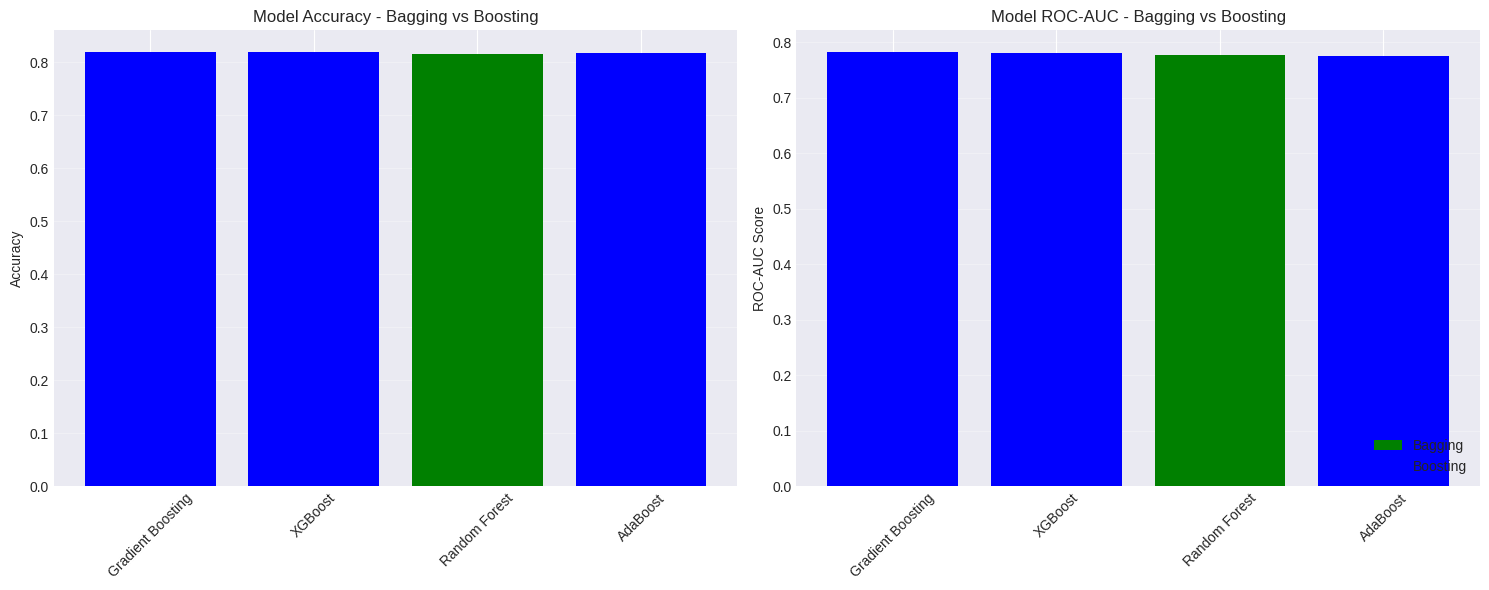

In [105]:
# Visualize Bagging vs Boosting comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

colors = ['green' if t == 'Bagging' else 'blue' for t in tuned_df['Type']]

# Accuracy
axes[0].bar(tuned_df['Model'], tuned_df['Accuracy'], color=colors)
axes[0].set_title('Model Accuracy - Bagging vs Boosting')
axes[0].set_ylabel('Accuracy')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# ROC-AUC
axes[1].bar(tuned_df['Model'], tuned_df['ROC-AUC'], color=colors)
axes[1].set_title('Model ROC-AUC - Bagging vs Boosting')
axes[1].set_ylabel('ROC-AUC Score')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)

# Add legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='green', label='Bagging'),
    Patch(facecolor='blue', label='Boosting')
]
axes[1].legend(handles=legend_elements, loc='lower right')

plt.tight_layout()
plt.show()

## 35. Save Best Model

In [106]:
# Identify best model
best_model_name = tuned_df.iloc[0]['Model']
best_model = tuned_models[best_model_name]

print(f"Best Model: {best_model_name}")

Best Model: Gradient Boosting


In [107]:
# Save model
joblib.dump(best_model, 'best_credit_default_model.pkl')
print("Model saved as 'best_credit_default_model.pkl'")

Model saved as 'best_credit_default_model.pkl'


In [108]:
# Save scaler
joblib.dump(scaler, 'scaler.pkl')
print("Scaler saved as 'scaler.pkl'")

Scaler saved as 'scaler.pkl'


## 36. Final Summary Report

# Final Project Summary – Credit Card Default Prediction

## Dataset Information
- **Total Records:** 30,000  
- **Total Features:** 28  
- **Training Samples:** 23,998  
- **Test Samples:** 6,000  
- **Default Rate:** 22.12%  

## Models Evaluated
1. Random Forest Classifier (Bagging)  
2. AdaBoost Classifier (Boosting)  
3. Gradient Boosting Classifier (Boosting)  
4. XGBoost Classifier (Boosting)  

## Best Model: Gradient Boosting
- **Type:** Boosting  
- **Accuracy:** 0.8187  
- **Precision:** 0.6648  
- **Recall:** 0.3632  
- **F1-Score:** 0.4698  
- **ROC-AUC:** 0.7819  

## Key Insights
- **Most Important Feature:** PAY_0  
- **Boosting outperforms Bagging on average**  
- **Hyperparameter tuning improved model performance**  

---

**Project completed successfully**
